In [1]:
import pandas as pd
import numpy as np

klek_key = pd.read_csv('keys/KlekFP_keys', names=['smarts'], sep='\t')
maccs_key = pd.read_csv('keys/MACCSFP_keys', names=['smarts'], sep='\t')
sub_key = pd.read_csv('keys/SubFP_keys', names=['smarts'], sep='\t')

In [2]:
#----------------------------------

df = klek_key

#----------------------------------

In [3]:
dataset = pd.read_csv('cleaned_datasets/5ht1a_Sub_clean.csv')

fp = dataset.iloc[0]
fp = fp[2:].astype(bool)

# decode fingerptint using key

fragments = []
for item in fp.items():
    present = item[1]
    if present:
        index = int(item[0][5:]) - 1
        smarts = (df.iloc[index][0])
        mol = Chem.rdmolfiles.MolFromSmarts(smarts)
        fragments.append(mol)

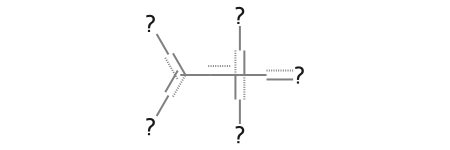

In [4]:
fragments[2]

In [45]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# load ChEMBL

# small molecule
# no RO5 violations
# 200 - 1000 Da
# targets 1, bioactivities 1

df = pd.read_csv('chembl.csv', sep=';', usecols=['Smiles'])

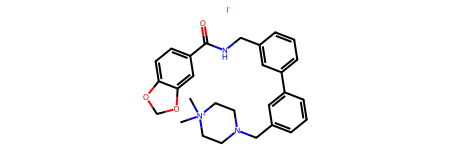

In [57]:
# view molecules in df

smiles = df.loc[9].iat[0]
mol = Chem.rdmolfiles.MolFromSmiles(smiles)
mol